# Machine Learning Pipeline - Scoring New Data

Let's imagine that a colleague from the business department comes and asks us to score the data from last months customers. They want to be sure that our model is working appropriately in the most recent data that the organization has.

**How would you go about to score the new data?** Try to give it a go. There is more than 1 way of doing it.

Below we present one potential solution.

What could we have done better?

In [1]:
import pandas as pd
import joblib
import numpy as np
import scipy.stats as stats

In [2]:
test_set = pd.read_csv('test.csv')

In [3]:
test_set.shape

(1459, 80)

In [4]:
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
original_columns = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

test_columns = test_set.columns

for column in original_columns:
    if column not in test_columns:
        print(f" {column} is in original but not in test ")
        
for column in test_columns:
    if column not in original_columns:
        print(f" {column} is in test but not in  original")

    

In [6]:
selected_features = pd.read_csv('selected_features.csv')
selected_features = selected_features.iloc[:,0].to_list()
test_set.drop(['Id'],axis=1, inplace=True)
cat_vars = [var for var in test_set.columns if test_set[var].dtype == 'O']
cat_vars = cat_vars + ['MSSubClass']
num_vars = [
    var for var in  test_set.columns if var not in cat_vars and var != 'SalePrice'
]
test_set[cat_vars] = test_set[cat_vars].astype('O')

In [7]:
test_set['MSSubClass'].dtype


dtype('O')

In [8]:
selected_features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

In [9]:
test_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
test_set.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

Categorical Variables

In [11]:
cat_vars_with_na = [
    var for var in cat_vars
    if test_set[var].isnull().sum() > 0
]

# print percentage of missing values per variable
test_set[cat_vars_with_na].isnull().mean().sort_values(ascending=False)


PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MSZoning        0.002742
Functional      0.001371
Utilities       0.001371
KitchenQual     0.000685
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
dtype: float64

In [12]:
new_vars_with_nan = [var for var in cat_vars_with_na if var not in ['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']]
print(new_vars_with_nan)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']


In [13]:
new_with_string_missing = [var for var in new_vars_with_nan if test_set[var].isnull().mean()>0.1]
new_with_frequent_category = [var for var in new_vars_with_nan if test_set[var].isnull().mean()<=0.1]
old_with_string_missing = [var for var in cat_vars_with_na if var in ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']]
old_with_frequent_category =  [var for var in cat_vars_with_na if var in ['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']]
with_string_missing = old_with_string_missing + new_with_string_missing
with_frequent_category = old_with_frequent_category + new_with_frequent_category

print(with_string_missing)
print(with_frequent_category)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']


In [14]:
most_frequent_category = {'MasVnrType': 'None',' BsmtCond': 'TA' ,'BsmtQual':'TA', 'BsmtExposure':'No', 'BsmtFinType1':'Unf','BsmtFinType2':'Unf', 'Electrical': 'SBrkr',
    'GarageType': 'Attchd','GarageFinish':'Unf', 'GarageQual': 'TA', 'GarageCond': 'TA'}

In [15]:
test_set[with_string_missing] = test_set[with_string_missing].fillna('Missing')
for var in with_frequent_category:
    mode = most_frequent_category.get(var,test_set[var].mode()[0])
    test_set[var].fillna(mode, inplace=True)
        

In [16]:
test_set[cat_vars_with_na].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

Numerical variables

In [17]:
num_vars_with_na = [
    var for var in num_vars
    if test_set[var].isnull().sum() > 0
]
test_set[num_vars_with_na].isnull().mean()

LotFrontage     0.155586
MasVnrArea      0.010281
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
GarageYrBlt     0.053461
GarageCars      0.000685
GarageArea      0.000685
dtype: float64

In [18]:
means = {'LotFrontage': 69.87974098057354, 'MasVnrArea':103.7974006116208,'GarageYrBlt':1978.2959677419356 }

In [19]:
for var in num_vars_with_na:
    mean_val = means.get(var, test_set[var].mean())
    test_set[var + '_na'] = np.where(test_set[var].isnull(), 1, 0)
    test_set[var].fillna(mean_val, inplace=True)
    
# check that we have no more missing values in the engineered variables
test_set[num_vars_with_na].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

Temporal variables

In [20]:
def elapsed_years(df, var):
    # capture difference between the year variable
    # and the year in which the house was sold
    df[var] = test_set['YrSold'] - df[var]
    return df

In [21]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    test_set = elapsed_years(test_set, var)
    
# now we drop YrSold
test_set.drop(['YrSold'], axis=1, inplace=True)


Logarithmic Transformation

In [22]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    test_set[var] = np.log(test_set[var])

Yeo johnson transformation

In [23]:
param = -12.55283001172003
test_set['LotArea'] = stats.yeojohnson(test_set['LotArea'], lmbda=param)


Binarize skewed variables

In [24]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

for var in skewed:
    # map the variable values into 0 and 1
    test_set[var] = np.where(test_set[var]==0, 0, 1)


Categorical mappings

In [25]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]
for var in qual_vars:
    test_set[var] = test_set[var].map(qual_mappings)


In [26]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'
test_set[var] = test_set[var].map(exposure_mappings)


In [27]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']
for var in finish_vars:
    test_set[var] = test_set[var].map(finish_mappings)


In [28]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'
test_set[var] = test_set[var].map(garage_mappings)

In [29]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'
test_set[var] = test_set[var].map(fence_mappings)

In [30]:
[var for var in test_set.columns if test_set[var].isnull().sum() > 0]

[]

Removing rare labels

In [31]:
qual_vars = qual_vars + finish_vars + ['BsmtExposure', 'GarageFinish', 'Fence']

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)


30

In [32]:
print(cat_others)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


In [33]:
test_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,GarageYrBlt_na,GarageCars_na,GarageArea_na
0,20,RH,4.382027,0.079663,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,4.394449,0.079663,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,4.304065,0.079663,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,60,RL,4.356709,0.079663,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
4,120,RL,3.761200,0.079663,Pave,Missing,IR1,HLS,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


In [34]:
type(test_set['MSSubClass'][0])

int

In [35]:
frequent_labels ={'MSZoning': ['FV', 'RH', 'RL', 'RM'], 'Street': ['Pave'], 'Alley': ['Grvl', 'Missing', 'Pave'], 'LotShape': ['IR1', 'IR2', 'Reg'], 'LandContour': ['Bnk', 'HLS', 'Low', 'Lvl'], 'Utilities': ['AllPub'], 'LotConfig': ['Corner', 'CulDSac', 'FR2', 'Inside'], 'LandSlope': ['Gtl', 'Mod'], 'Neighborhood': ['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber'], 'Condition1': ['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], 'Condition2': ['Norm'], 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], 'HouseStyle': ['1.5Fin', '1Story', '2Story', 'SFoyer', 'SLvl'], 'RoofStyle': ['Gable', 'Hip'], 'RoofMatl': ['CompShg'], 'Exterior1st': ['AsbShng', 'BrkFace', 'CemntBd', 'HdBoard', 'MetalSd', 'Plywood', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'], 'Exterior2nd': ['AsbShng', 'BrkFace', 'CmentBd', 'HdBoard', 'MetalSd', 'Plywood', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'], 'MasVnrType': ['BrkFace', 'None', 'Stone'], 'Foundation': ['BrkTil', 'CBlock', 'PConc', 'Slab'], 'Heating': ['GasA', 'GasW'], 'CentralAir': ['N', 'Y'], 'Electrical': ['FuseA', 'FuseF', 'SBrkr'], 'Functional': ['Min1', 'Min2', 'Mod', 'Typ'], 'GarageType': ['Attchd', 'Basment', 'BuiltIn', 'Detchd'], 'PavedDrive': ['N', 'P', 'Y'], 'PoolQC': ['Missing'], 'MiscFeature': ['Missing', 'Shed'], 'SaleType': ['COD', 'New', 'WD'], 'SaleCondition': ['Abnorml', 'Family', 'Normal', 'Partial'], 'MSSubClass': ['20', '30', '50', '60', '70', '75', '80', '85', '90', '120', '160', '190']}

In [36]:
for var in cat_others:
    # find the frequent categories
    frequent_ls = frequent_labels[var]

    # replace rare categories by the string "Rare"
    test_set[var] = np.where(test_set[var].isin(
        frequent_ls), test_set[var], 'Rare')

In [37]:
test_set['MSSubClass'].dtype


dtype('O')

In [38]:
test_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,GarageYrBlt_na,GarageCars_na,GarageArea_na
0,Rare,RH,4.382027,0.079663,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,Rare,RL,4.394449,0.079663,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
2,Rare,RL,4.304065,0.079663,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,Rare,RL,4.356709,0.079663,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
4,Rare,RL,3.761200,0.079663,Pave,Missing,IR1,HLS,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


encoding of categorical variables

In [39]:
encodings = {'MSZoning': {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}, 'Street': {'Rare': 0, 'Pave': 1}, 'Alley': {'Grvl': 0, 'Pave': 1, 'Missing': 2}, 'LotShape': {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}, 'LandContour': {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}, 'Utilities': {'Rare': 0, 'AllPub': 1}, 'LotConfig': {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}, 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Rare': 2}, 'Neighborhood': {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}, 'Condition1': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}, 'Condition2': {'Rare': 0, 'Norm': 1}, 'BldgType': {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}, 'HouseStyle': {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story': 5}, 'RoofStyle': {'Gable': 0, 'Rare': 1, 'Hip': 2}, 'RoofMatl': {'CompShg': 0, 'Rare': 1}, 'Exterior1st': {'AsbShng': 0, 'Wd Sdng': 1, 'WdShing': 2, 'MetalSd': 3, 'Stucco': 4, 'Rare': 5, 'HdBoard': 6, 'Plywood': 7, 'BrkFace': 8, 'CemntBd': 9, 'VinylSd': 10}, 'Exterior2nd': {'AsbShng': 0, 'Wd Sdng': 1, 'MetalSd': 2, 'Wd Shng': 3, 'Stucco': 4, 'Rare': 5, 'HdBoard': 6, 'Plywood': 7, 'BrkFace': 8, 'CmentBd': 9, 'VinylSd': 10}, 'MasVnrType': {'Rare': 0, 'None': 1, 'BrkFace': 2, 'Stone': 3}, 'Foundation': {'Slab': 0, 'BrkTil': 1, 'CBlock': 2, 'Rare': 3, 'PConc': 4}, 'Heating': {'Rare': 0, 'GasW': 1, 'GasA': 2}, 'CentralAir': {'N': 0, 'Y': 1}, 'Electrical': {'Rare': 0, 'FuseF': 1, 'FuseA': 2, 'SBrkr': 3}, 'Functional': {'Rare': 0, 'Min2': 1, 'Mod': 2, 'Min1': 3, 'Typ': 4}, 'GarageType': {'Rare': 0, 'Detchd': 1, 'Basment': 2, 'Attchd': 3, 'BuiltIn': 4}, 'PavedDrive': {'N': 0, 'P': 1, 'Y': 2}, 'PoolQC': {'Missing': 0, 'Rare': 1}, 'MiscFeature': {'Rare': 0, 'Shed': 1, 'Missing': 2}, 'SaleType': {'COD': 0, 'Rare': 1, 'WD': 2, 'New': 3}, 'SaleCondition': {'Rare': 0, 'Abnorml': 1, 'Family': 2, 'Normal': 3, 'Partial': 4}, 'MSSubClass': {30: 0, 'Rare': 1, 190: 2, 90: 3, 160: 4, 50: 5, 85: 6, 70: 7, 80: 8, 20: 9, 75: 10, 120: 11, 60: 12}}

In [40]:
for var in cat_others:
    test_set[var] = test_set[var].map(encodings[var])

In [41]:
[var for var in test_set.columns if test_set[var].isnull().sum() > 0]


[]

In [42]:
scaler = joblib.load('minmax_scaler.joblib')

In [43]:
test_set.shape

(1459, 89)

In [44]:
original_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'SaleType', 'SaleCondition', 'LotFrontage_na',
       'MasVnrArea_na', 'GarageYrBlt_na']
test_columns = test_set.columns

in_original_not_in_test = []
in_test_not_in_original = []

for column in original_columns:
    if column not in test_columns:
        in_original_not_in_test.append(column)
        
for column in test_columns:
    if column not in original_columns:
        in_test_not_in_original.append(column)
        
print(in_original_not_in_test)
print(in_test_not_in_original)


[]
['BsmtFinSF1_na', 'BsmtFinSF2_na', 'BsmtUnfSF_na', 'TotalBsmtSF_na', 'BsmtFullBath_na', 'BsmtHalfBath_na', 'GarageCars_na', 'GarageArea_na']


In [45]:
test_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,GarageYrBlt_na,GarageCars_na,GarageArea_na
0,1,2,4.382027,0.079663,1,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.394449,0.079663,1,2,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1,3,4.304065,0.079663,1,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,4.356709,0.079663,1,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,3.761200,0.079663,1,2,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
test_set = test_set.drop(columns = in_test_not_in_original)
test_set =pd.DataFrame(scaler.transform(test_set), columns = test_set.columns)[selected_features]

In [47]:
test_set.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,...,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,ScreenPorch,SaleCondition
0,0.083333,0.50,0.495064,0.000000,0.333333,0.0,0.363636,0.444444,0.625,0.819672,...,1.0,0.000000,0.0,0.0,0.25,0.514810,1.0,0.163361,1.0,0.75
1,0.083333,0.75,0.499662,0.333333,0.333333,0.5,0.363636,0.555556,0.625,0.868852,...,1.0,0.000000,0.0,0.0,0.25,0.220028,1.0,0.458576,0.0,0.75
2,0.083333,0.75,0.466207,0.333333,0.333333,0.0,0.590909,0.444444,0.500,0.213115,...,1.0,0.333333,0.6,1.0,0.50,0.339915,1.0,0.247375,0.0,0.75
3,0.083333,0.75,0.485693,0.333333,0.333333,0.0,0.590909,0.555556,0.625,0.213115,...,1.0,0.333333,0.8,1.0,0.50,0.331453,1.0,0.420070,0.0,0.75
4,0.083333,0.75,0.265271,0.333333,1.000000,0.0,0.909091,0.777778,0.500,0.311475,...,1.0,0.000000,0.0,0.5,0.50,0.356841,1.0,0.000000,1.0,0.75


In [48]:
lin_model = joblib.load('linear_regression.joblib')

In [49]:
predictions = lin_model.predict(test_set)

<AxesSubplot:>

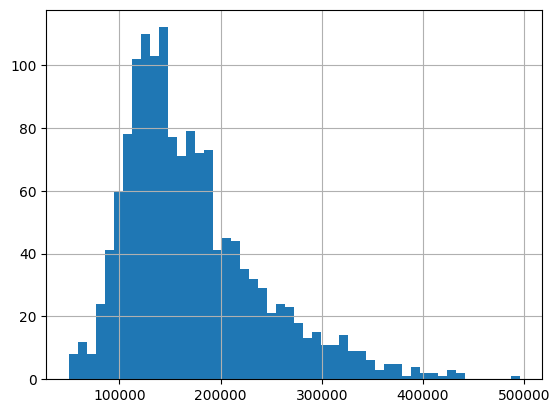

In [50]:
pd.Series(np.exp(predictions)).hist(bins=50)